In [1]:
import torch
from ptbxlae.modeling.convolutionalVAE import ConvolutionalEcgVAE

* PTB-XL Autoencoder *


In [2]:
torch.no_grad()
m = ConvolutionalEcgVAE.load_from_checkpoint('../cache/scc-saved.ckpt')
m = m.eval()
m

ConvolutionalEcgVAE(
  (encoder): ConvolutionalEcgEncoder(
    (net): Sequential(
      (0): Conv1d(12, 24, kernel_size=(13,), stride=(2,), padding=(6,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): Conv1d(24, 48, kernel_size=(13,), stride=(2,), padding=(6,))
      (3): LeakyReLU(negative_slope=0.01)
      (4): Flatten(start_dim=1, end_dim=-1)
      (5): Linear(in_features=6000, out_features=1500, bias=True)
      (6): LeakyReLU(negative_slope=0.01)
    )
  )
  (decoder): ConvolutionalEcgDecoder(
    (net): Sequential(
      (0): Linear(in_features=40, out_features=1500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=1500, out_features=6000, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Unflatten(dim=1, unflattened_size=(48, 125))
      (5): ConvTranspose1d(48, 24, kernel_size=(13,), stride=(2,), padding=(6,), output_padding=(1,))
      (6): LeakyReLU(negative_slope=0.01)
      (7): ConvTranspose1d(24, 12, kernel_size=(13,),

In [3]:
from ptbxlae.dataprocessing.cachedDS import SingleCycleCachedDS

SAMPLE_IDX = 929

ds = SingleCycleCachedDS(cache_path="../cache/singlecycle_data")
sig = ds[SAMPLE_IDX]
sig.shape

torch.Size([12, 500])

Grad on: False
Training mode: False


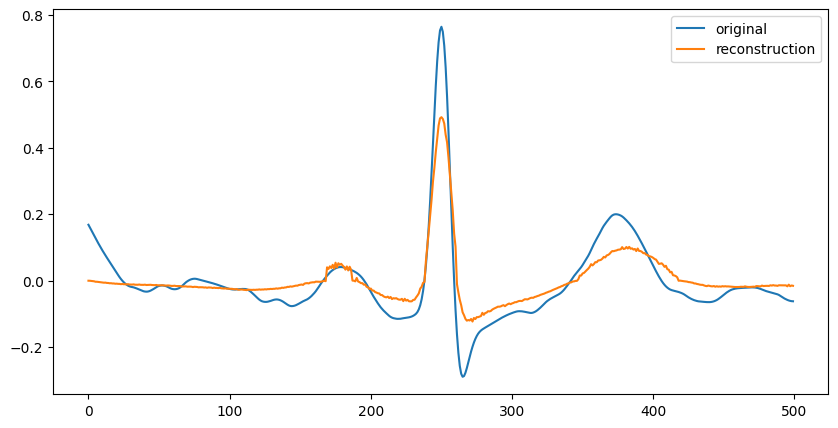

In [20]:
# from ptbxlae.dataprocessing import plot_raw_data

# # before
# plot_raw_data(sig[0:12], {'fs': 500})

import matplotlib.pyplot as plt

x = range(0, sig.shape[1])

SAMPLE_IDX = 1289
CHANNEL = 1

with torch.no_grad():
    print(f"Grad on: {torch.is_grad_enabled()}")
    print(f"Training mode: {m.training}")

    latent_representation = m.encode(ds[SAMPLE_IDX].unsqueeze(0).to('cuda'))
    #reconstruction = m.generate(latent_representation, smoothing_iterations=100).squeeze().detach().cpu()
    reconstruction = m.decode(latent_representation).squeeze().detach().cpu()
    orig_plot = ds[SAMPLE_IDX][CHANNEL]
    recon_plot = reconstruction[CHANNEL]

    plt.rcParams['figure.figsize'] = [10, 5]
    fig, ax = plt.subplots()
    ax.plot(x, orig_plot, label='original')
    ax.plot(x, recon_plot, label='reconstruction')
    plt.legend(loc='best')